# Principal Component Analysis (PCA)


*   Converts data from d-dimentional space to a lower dimentional space
*   Helps in faster training and inference of models
*   Data visualization becomes easier with lower dimentional representation of data



PCA finds a new set of dimensions such that all the dimentions are orthogonal (and hence linearly independent) and ranked according to the variance of the data along them.

Find a transformation such that


*   The transformed features are linearly independent
*   Dimentionality can be reduced by taking only the dimentions with highest importance
* The newly found dimentions should minimize projection error
* The projected points should have maximum spread, i.e. maximum variance

This is done by calculating the eigen vectors and eigen values of covariance matrix $Cov(X)$.

The eigen vectors point in the direction of maximum variance, and the corresponding eigen values indicate the importance of its corresponding eigen vector

$Av=\lambda v$



## Steps


1.   Subtract the mean from X
2.   Calculate covariance matrix
3.   Calculate eigen values and eigen vectors of the covariance matrix
4.   Sort the eigen vectors according to the eigen values in descending order
5.   Choose the first k eigen vectors and that will be the new k dimentions
6.   Transform the original d-dimentional data points into k dimentions (projections with dot product)



# Library Usage

## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

In [ ]:
data = pd.read_csv("Iris.csv")

In [ ]:
print(data.shape)
data.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
y = data["Species"]
X = data.drop(["Species", "Id"], axis=1)

## Perform PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
X_new = pca.fit_transform(X)

In [ ]:
pca.get_covariance() # Covariance matrix

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

Text(0, 0.5, 'Explained Variance')

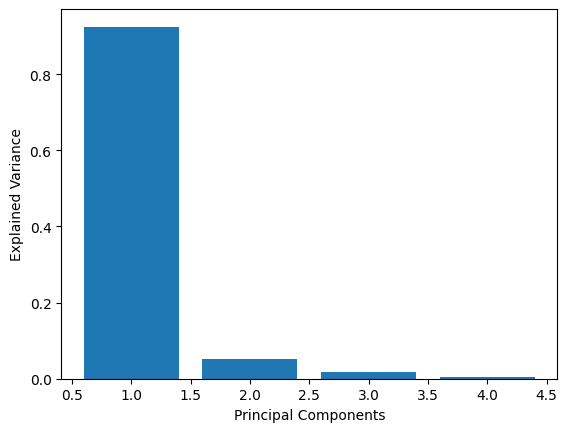

In [ ]:
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance")

In [ ]:
X_new.shape

(150, 4)

## Select 0.97 as our variance cutoff

In [ ]:
pca_2=PCA(n_components=2)
X_new_2=pca_2.fit_transform(X)

In [ ]:
exp_var=pca_2.explained_variance_ratio_
print("Percentage sum of explained variance: {}%".format(np.round(np.sum(exp_var)*100, 2)))

Percentage sum of explained variance: 97.76%


In [ ]:
X_new_2.shape

(150, 2)

In [ ]:
pca_2.get_covariance()

array([[ 0.67919741, -0.03258618,  1.27066452,  0.5321852 ],
       [-0.03258618,  0.18113034, -0.31863564, -0.13363564],
       [ 1.27066452, -0.31863564,  3.11934547,  1.28541527],
       [ 0.5321852 , -0.13363564,  1.28541527,  0.58961806]])

# Custom Implementation

## Perform Mean Centering

In [ ]:
X_mean = X-np.mean(X, axis=0)

In [ ]:
cov_matrix = np.cov(X_mean.T)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [ ]:
eigenvalues

array([0.02368303, 0.07852391, 0.24224357, 4.22484077])

In [ ]:
np.sort(eigenvalues)

array([0.02368303, 0.07852391, 0.24224357, 4.22484077])

In [ ]:
eigenvectors = eigenvectors.T

In [ ]:
idx = np.argsort(eigenvalues)[::-1]
idx

array([3, 2, 1, 0])

In [ ]:
eigenvectors = eigenvectors[idx]
eigenvalues = eigenvalues[idx]

In [ ]:
print(eigenvalues)

[4.22484077 0.24224357 0.07852391 0.02368303]


In [ ]:
print(eigenvectors)

[[-0.36158968  0.08226889 -0.85657211 -0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [ 0.58099728 -0.59641809 -0.07252408 -0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]


In [ ]:
explained_variance_custom = eigenvalues / np.sum(eigenvalues)
explained_variance_custom

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [ ]:
np.cumsum(explained_variance_custom)

array([0.92461621, 0.97763178, 0.99481691, 1.        ])

Selecting 0.97 as our variance cutoff so 2 Principal Componenst are selected

In [ ]:
principal_components = eigenvectors[:2]
principal_components

array([[-0.36158968,  0.08226889, -0.85657211, -0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [ ]:
X_new_custom = np.dot(X_mean, principal_components.T)

In [ ]:
print(X_new_custom[:3])
print(X_new_2[:3])

[[ 2.68420713  0.32660731]
 [ 2.71539062 -0.16955685]
 [ 2.88981954 -0.13734561]]
[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]]


## Visualization from Custom Projection

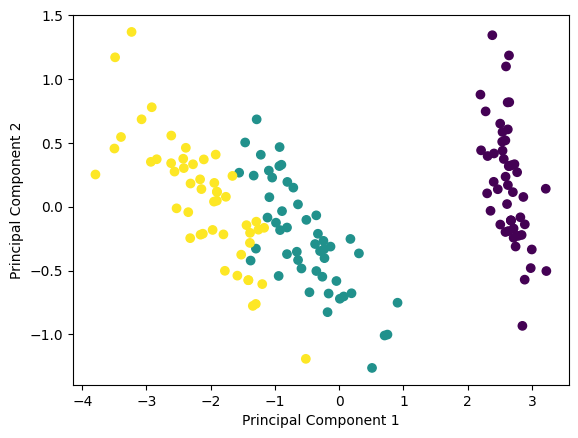

In [ ]:
plt.scatter(X_new_custom[:,0], X_new_custom[:,1], c=y.astype('category').cat.codes)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

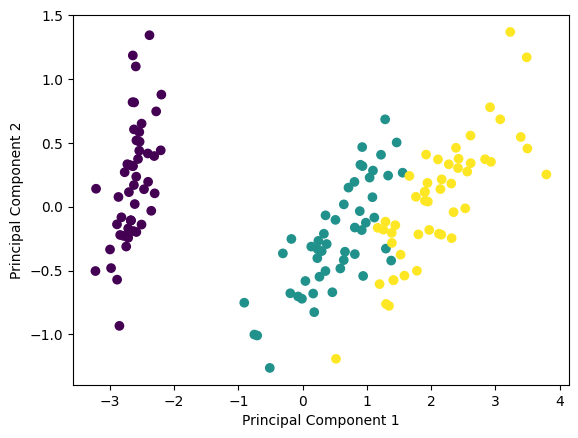

In [ ]:
plt.scatter(X_new_2[:,0], X_new_2[:,1], c=y.astype('category').cat.codes)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

##  Custom PCA on simple data

In [ ]:
x1 = np.array([1,2,3,4,5])
x2 = np.array([1,2,3,4,5])

In [ ]:
x_combined = np.stack((x1, x2), axis=1)
x_combined

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5]])

In [ ]:
pca = PCA()
x_combined_new = pca.fit_transform(x_combined)

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([1.00000000e+00, 7.39557099e-33])

In [ ]:
pca_1=PCA(n_components=1)
x_combined_new_1=pca_1.fit_transform(x_combined)

In [ ]:
exp_var=pca_1.explained_variance_ratio_
print("Percentage sum of explained variance: {}%".format(np.round(np.sum(exp_var)*100, 2)))

Percentage sum of explained variance: 100.0%


In [ ]:
x_combined_mean = x_combined-np.mean(x_combined, axis=0)
x_combined_mean

array([[-2., -2.],
       [-1., -1.],
       [ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  2.]])

In [ ]:
x_combined_cov = np.cov(x_combined_mean.T)
x_combined_cov

array([[2.5, 2.5],
       [2.5, 2.5]])

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(x_combined_cov)

In [ ]:
eigenvalues

array([0., 5.])

In [ ]:
eigenvectors

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
eigenvectors[:,1]

array([0.70710678, 0.70710678])

In [ ]:
np.linalg.norm(eigenvectors[:,1])

0.9999999999999999

In [ ]:
eigenvectors[:,1].shape

(2,)

In [ ]:
x_combined_mean.shape

(5, 2)

In [ ]:
X_new_simple = np.dot(x_combined_mean, eigenvectors[:,1].T)

In [ ]:
X_new_simple

array([-2.82842712, -1.41421356,  0.        ,  1.41421356,  2.82842712])